## Analyse Titanic - Data Science

### Exploratory Data Analysis

#### Objectif

- Prédire si un passager a survécu ou non au naufrage du Titanic

#### Critère de succès (métrique principale)
**Accuracy :** $ \ge $ 83 - 85 % (faire mieux que gender_submission ~ 76.5%)

**Métriques secondaires :**
    - 
| Métrique               | Seuil minimum à viser        |
|------------------------|------------------------------|
| **Précision**          |  $\ge 80$%                   |
| **Recall**          |  $\ge 80$%                   |
| **F1-score**          |  $\ge 0.8$                   |


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 100)

L'acquisition des datasets s'est fait sur:  
https://www.kaggle.com/code/startupsci/titanic-data-science-solutions

In [6]:
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")

# Combine datasets together to run certain operations 
all_df = pd.concat([train_df, test_df], axis=0, ignore_index=True)

In [11]:
display(train_df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### Identification de la target

In [19]:
train_df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [27]:
train_df["Survived"].value_counts(normalize=True).values * 100

array([61.61616162, 38.38383838])

In [ ]:
# Dimensions du dataset
print(train_df.shape)
print(all_df.shape)

(891, 12)
(418, 11)
(1309, 12)


In [17]:
# Types
train_df.dtypes.value_counts()

int64      5
object     5
float64    2
Name: count, dtype: int64

<Axes: ylabel='count'>

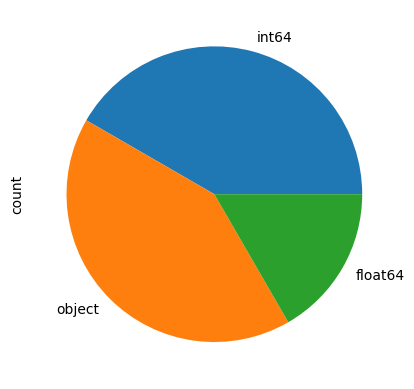

In [18]:
train_df.dtypes.value_counts().plot.pie()

##### Détection des valeurs manquantes

In [ ]:
# Pourcentage de valeurs manquantes pour chaque colonne 
(train_df.isnull().sum() / train_df.shape[0]).round(3).sort_values(ascending=False) * 100

Cabin          77.1
Age            19.9
Embarked        0.2
PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
dtype: float64

In [44]:
import missingno as msno

<Axes: >

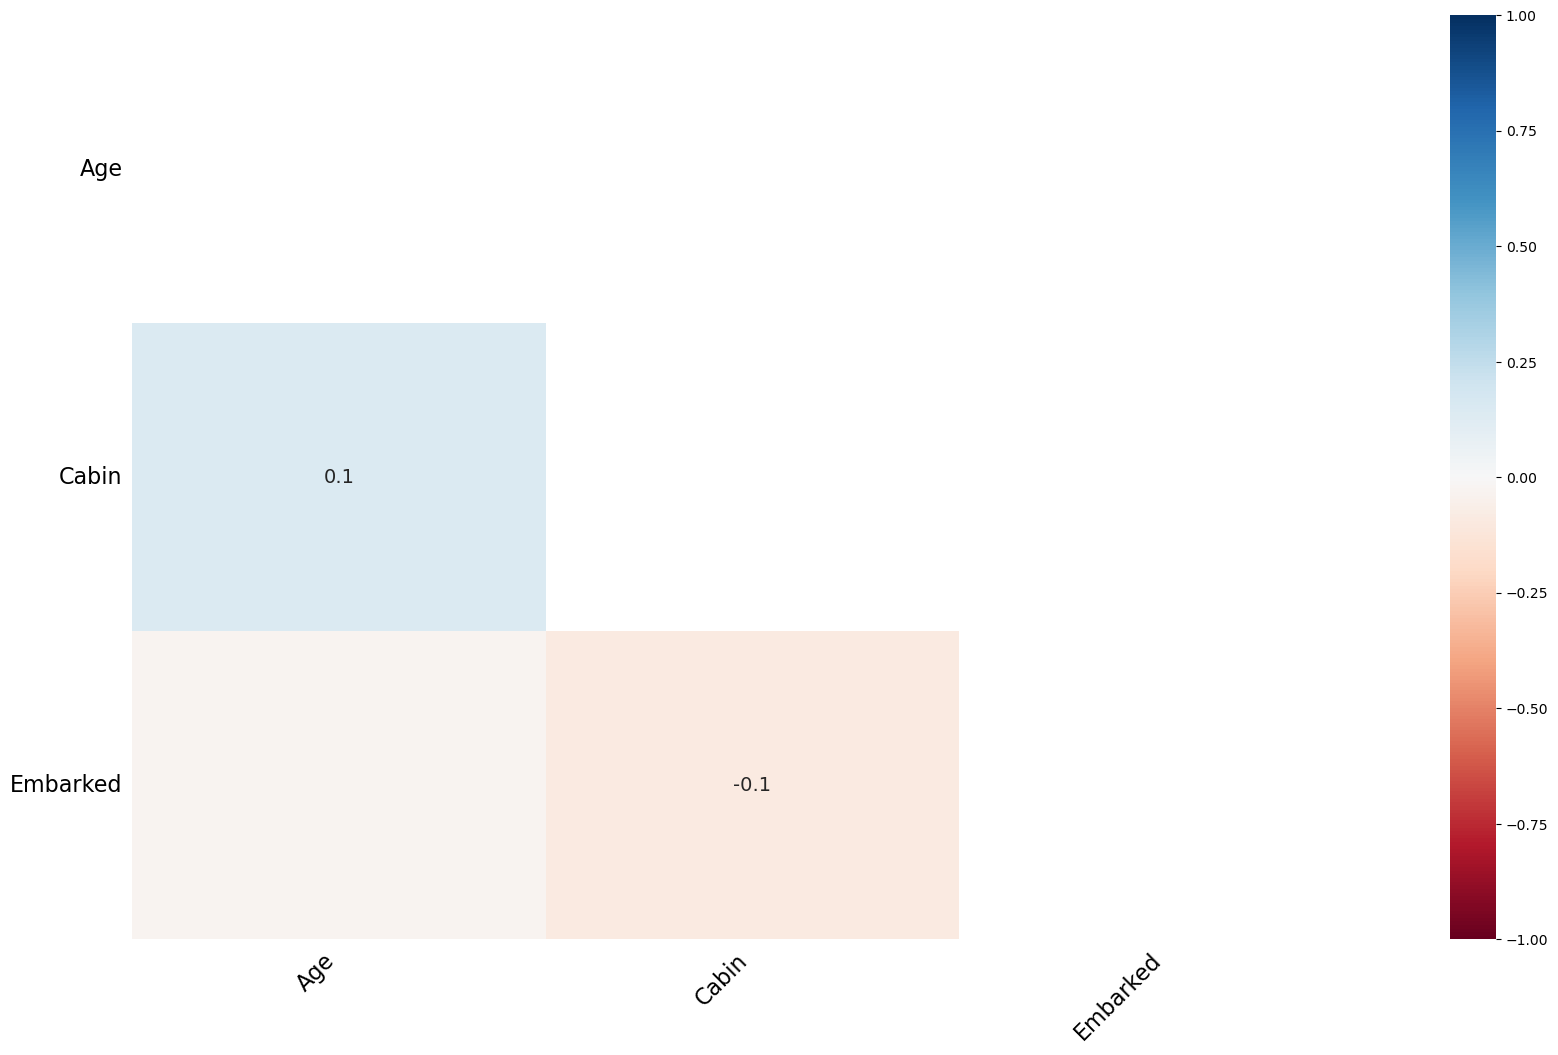

In [52]:
msno.heatmap(train_df)

<Axes: >

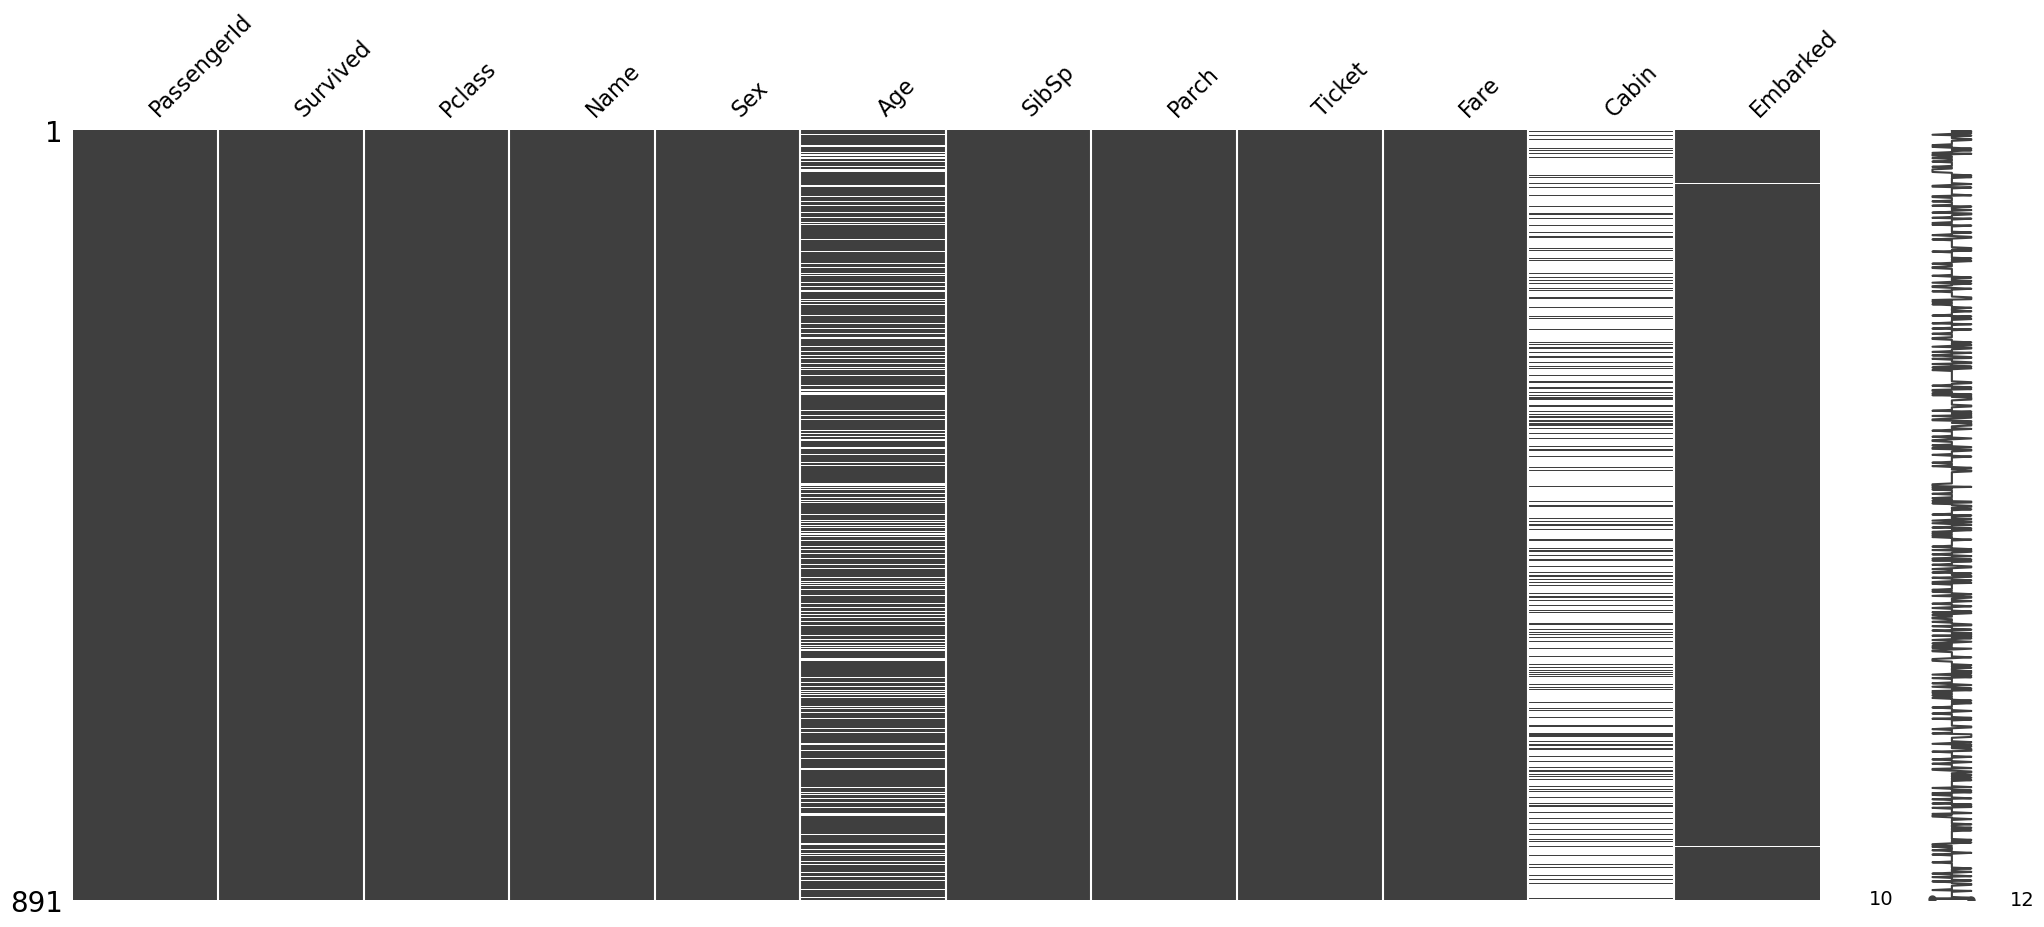

In [53]:
msno.matrix(train_df)

##### Duplicats

In [55]:
train_df.duplicated().sum()

0

210